# Generalized Linear Models

MLE inspires more flexible model specifications. Generalized linear models were formulated by John Nelder and Robert Wedderburn as a way of unifying various other statistical models, including linear regression, logistic regression and Poisson regression.

## 1. Linear Exponential Family

Any distribution that can be expressed in the following formats belongs to the Linear Exponential Family (LEF)

$$f(y|\mu) = exp(a(\mu)+b(y)+c(\mu)y))$$

This family of distributions share several convenient algebraic [properties](https://en.wikipedia.org/wiki/Exponential_family). For example, we have

1. $Var(y) = [c'(\mu)]^{-1}$
2. lnf = $a(\mu)+b(y)+c(\mu)y$

### Examples of exponential family distributions

**Normal Distribution**

$f(y) = exp(\frac{-\mu^2}{2\sigma}-\frac{1}{2}ln(2\pi\sigma^2)-\frac{y^2}{2\sigma^2}+\mu/\sigma^2 y)$

$Var(y) = sigma^2$


**Bernoulli Distribution**


$f(y) = exp(ln(1-\mu)+ln(\mu/1-\mu)y)$

$Var(y) = \mu(1-\mu)$

**Exponential Distribution**

$f(y) = exp(ln(1/\mu) - \frac{y}{\mu})$

$Var(y) = \mu^2$

**Poisson Distribution**

$f(y) = exp(-\mu - lny! + yln\mu)$

$Var(y) = \mu$

## 2. Integrate OLS-like specifications in MLE

Note that the simple linear and multiple linear regression models provides the specification of $E[y|x]$. But in order to use MLE, we need to find $f(y)$. Distributions that belong to the LEF build the connection between the two method. Specifically, we can specify the conditional mean as

$E[y|x] = \mu = g^{-1}(x\beta)$

where $g(.)$ is called the link function. In linear regression, we used an identity link function. But in a more generalized case, the link function is selected according to the support of the distribution of y, or simply the range of y.

For example, when y can only take positive values, we can choose the log link function, i.e.

$\mu = exp(x\beta)$

When y can only take 0 or 1 values, we know that $\mu$ is less than 0 and greater than 1. So we can choose the logit link function.

$\mu = \frac{exp(x\beta)}{1+exp(x\beta)}$

We can then choose a specific distribution of y and estimate the parameters using MLE.

## 3. GLM

Models based on an assumed LEF density are called generalized-linear-models. 

> A model combines steps mentioned in Section 1 (choose a density function) and Section 2 (choose a link function) is called GLM.

One import property of GLM: As long as $\mu$ is correctly specified, MLE estimator is always consistent, regardless of the choice of the LEF density function.

## 4.Implement GLM in statsmodels

The implementation GLM in statsmodels is straight forward. Use [smf.glm()](https://www.statsmodels.org/dev/generated/statsmodels.genmod.generalized_linear_model.GLM.html#statsmodels.genmod.generalized_linear_model.GLM)

Click to find details about the dataset [Taxation Powers Vote for the Scottish Parliament 1997](https://www.statsmodels.org/devel/datasets/generated/scotland.html)

In [19]:
# Load modules and data
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.genmod.families.links as links

data = sm.datasets.scotland.load_pandas()

# Instantiate a gamma family model with the default link function.
exog = "+".join(data.exog_name)
reg = smf.glm("YES ~ "+exog, data = data.data, family=sm.families.Gamma(link=links.log()))
res = reg.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                       0.0035927
Method:                          IRLS   Log-Likelihood:                -83.110
Date:                Wed, 20 Apr 2022   Deviance:                     0.087988
Time:                        23:35:07   Pearson chi2:                   0.0862
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.6581      0

### Exercise

Use the [strikes](https://www.statsmodels.org/devel/datasets/generated/strikes.html) dataset from sm.datasets and estimate the effect of unanticipated industrial production on the duration of strikes.

Try different family and link functions (https://www.statsmodels.org/dev/glm.html)

In [26]:
ds = sm.datasets.strikes.load_pandas()
df = ds.data
df

,duration,iprod
0,7.0,0.01138
1,9.0,0.01138
2,13.0,0.01138
3,14.0,0.01138
4,26.0,0.01138
...,...,...
57,21.0,-0.00700
58,27.0,-0.00700
59,38.0,-0.00700
60,42.0,-0.00700


<AxesSubplot:>

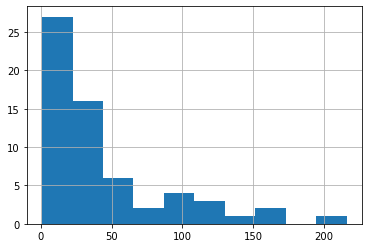

In [33]:
df["duration"].hist()

In [34]:
# Instantiate a gamma family model with the default link function.
reg = smf.glm("duration ~ iprod", data = df, family=sm.families.NegativeBinomial())
res = reg.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               duration   No. Observations:                   62
Model:                            GLM   Df Residuals:                       60
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -290.58
Date:                Thu, 21 Apr 2022   Deviance:                       66.880
Time:                        00:11:22   Pearson chi2:                     54.9
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7760      0.132     28.590      0.0